Let's go out into the world and generate some beautiful visuals. Pick a data source from this aggregation, load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

Data Set downloaded from here: https://www.kaggle.com/donorschoose/io/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
donations = pd.read_csv(r'io\Donations.csv', nrows = 100000) #cut off rows and 100,000 due to memory error

In [3]:
schools = pd.read_csv(r'io\Schools.csv')

In [4]:
resources = pd.read_csv(r'io\Resources.csv')

[Text(0,0,'0.001'),
 Text(0,0,'0.01'),
 Text(0,0,'0.1'),
 Text(0,0,'1.0'),
 Text(0,0,'10.0'),
 Text(0,0,'100.0'),
 Text(0,0,'1000.0'),
 Text(0,0,'10000.0')]

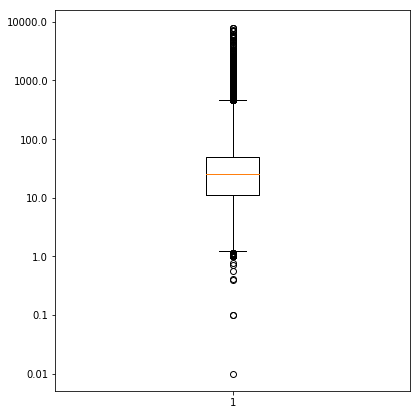

In [5]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(1,2,1)

ax.boxplot(np.log10(donations['Donation Amount'],))
#ax.set_yticks(np.arange(-3,4))
ax.set_yticklabels(10.0**np.arange(-3, 5))

Text(0.5,1,'Donation Amount Box and Whisker')

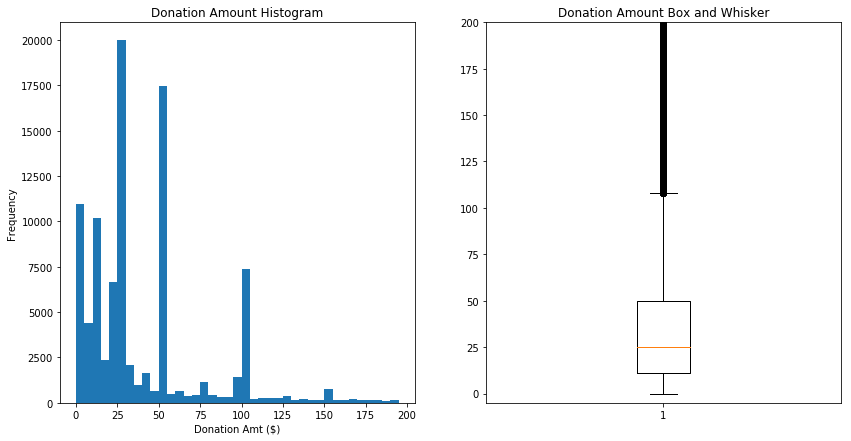

In [6]:
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
plt.hist(donations['Donation Amount'], bins = np.arange(0,200,5))
plt.xlabel(r'Donation Amt ($)')
plt.ylabel(r'Frequency')
plt.title('Donation Amount Histogram')

plt.subplot(1,2,2)
plt.boxplot(donations['Donation Amount'])
plt.ylim(ymax=200, ymin=-5)
plt.title('Donation Amount Box and Whisker')

Donation amount frequencies spike at 25, 50, 10, 1, 100, 20... with 25 being most common donation amount. This is likely because people have a natural tendency to donate at round figures.

The Data is skewed right with no outliers to the left but many to the right. This is because most people donated between 0 and $100, but some people donate a lot more.

The x axis on the histogram and the y axis on the box and whisker plot (Donation Amount) is cut off at $200 because of very high outliers. Showing all of the data (with outliers) makes the data difficult to see.

In [7]:
donations['Donation Amount'].value_counts()

25.00     19341
50.00     17033
10.00      9486
1.00       7964
100.00     7145
20.00      5948
5.00       3465
2.00       1801
15.00      1712
30.00      1478
40.00      1169
99.00      1037
200.00      887
75.00       859
150.00      610
3.00        536
35.00       366
60.00       325
250.00      321
500.00      230
125.00      198
300.00      189
4.00        168
6.00        136
45.00       123
80.00       119
70.00       112
6.32        104
7.00        104
18.00       103
          ...  
22.92         1
52.14         1
33.37         1
33.38         1
63.18         1
54.21         1
54.04         1
120.38        1
224.55        1
193.45        1
52.28         1
134.08        1
16.38         1
48.99         1
29.07         1
162.69        1
8.95          1
321.35        1
208.24        1
287.21        1
26.21         1
48.43         1
89.87         1
48.32         1
127.30        1
111.12        1
27.22         1
164.34        1
461.87        1
16.67         1
Name: Donation Amount, L

mean is: 58.5561153482
median is: 61.0


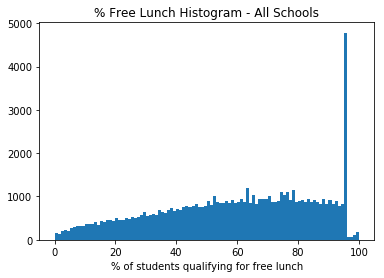

In [8]:
plt.hist(schools['School Percentage Free Lunch'].dropna(), bins=100)
plt.title('% Free Lunch Histogram - All Schools')
plt.xlabel('% of students qualifying for free lunch')

m = np.mean(schools['School Percentage Free Lunch'].dropna())
md = np.median(schools['School Percentage Free Lunch'].dropna())
print('mean is: ' + str(m))
print('median is: '+ str(md))

The average amount of students qualifying for free lunch in a school is 58.556%, with the distribution being skewed slightly left. 

There is a strange spike at 95% meaning an unusual amount of schools have exactly 95% of their students qualifying for free lunch. Perhaps that is the maximum number of students many schools can have qualifying for free lunches. 

The data becomes much more interesting below where we look at this distribution divided by school type (rural, suburban, and urban).

rural mean:55.8644906799                       suburban mean:49.3325059874                   urban mean: 68.324678197
rural median: 57.0                             suburban median: 49.0                         urban median: 75.0


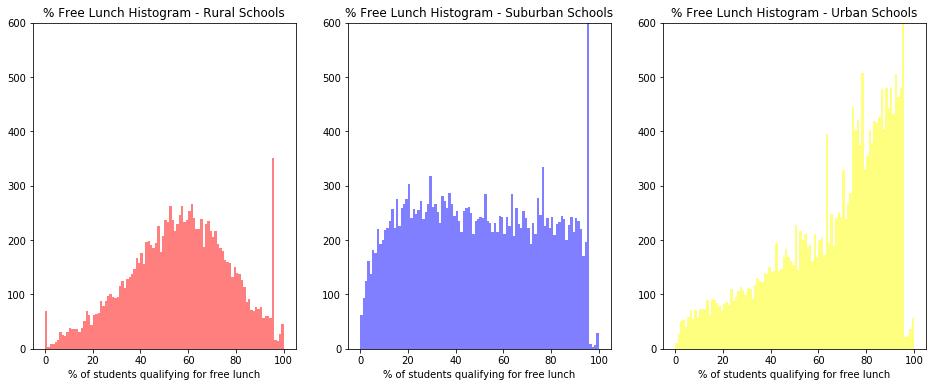

In [9]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
rural_schools = schools[schools['School Metro Type']=='rural']
plt.hist(rural_schools['School Percentage Free Lunch'].dropna(), bins = 100, alpha = .5, color = 'red')
plt.ylim(ymax=600)
plt.title('% Free Lunch Histogram - Rural Schools')
plt.xlabel('% of students qualifying for free lunch')

plt.subplot(1,3,2)
suburban_schools = schools[schools['School Metro Type']=='suburban']
plt.hist(suburban_schools['School Percentage Free Lunch'].dropna(), bins = 100, alpha = .5, color = 'blue')
plt.title('% Free Lunch Histogram - Suburban Schools')
plt.xlabel('% of students qualifying for free lunch')
plt.ylim(ymax=600)

plt.subplot(1,3,3)
urban_schools = schools[schools['School Metro Type']=='urban']
plt.hist(urban_schools['School Percentage Free Lunch'].dropna(), bins = 100, alpha = .5, color = 'yellow')
plt.ylim(ymax=600)
plt.title('% Free Lunch Histogram - Urban Schools')
plt.xlabel('% of students qualifying for free lunch')

rm = np.mean(rural_schools['School Percentage Free Lunch'].dropna()) #rural mean
rmd = np.median(rural_schools['School Percentage Free Lunch'].dropna()) #rural median

sm = np.mean(suburban_schools['School Percentage Free Lunch'].dropna()) # suburban mean
smd = np.median(suburban_schools['School Percentage Free Lunch'].dropna()) # suburban median

um = np.mean(urban_schools['School Percentage Free Lunch'].dropna()) #urban mean
umd = np.median(urban_schools['School Percentage Free Lunch'].dropna()) #urban median


print('rural mean:'+str(rm)+'                       suburban mean:'+str(sm)+'                   urban mean: ' +str(um))
print('rural median: '+str(rmd)+'                             suburban median: '+str(smd)+'                         urban median: '+str(umd))

        
#np.mean(suburban_schools['School Percentage Free Lunch'])


The average percentage of students qualifying for free lunch is highest in urban schools (68.3%), second highest in rural schools (55.9%), and lowest in suburban schools (49.3%). The unusual amount of schools that have exactly 95% of their students qualifying for free lunch is present in all three distributions, although the spike is lowest in the rural schools distribution.

With regards to this metric rural schools seem to be normally distributed while the suburban schools are more uniformly distributed. Assuming this metric can be used as a proxy for poverty level in a school's community, this would suggests that the rural schools in this dataset tend to have more consistent poverty levels while the poverty levels in the suburban schools vary widely. Urban schools would then have the highest poverty levels. The left skewness of the urban school distribution would also suggest that there are relatively few low poverty level urban schools.

mean is: $556.021077902
median is: $385.33
maximum project cost: $214135.0


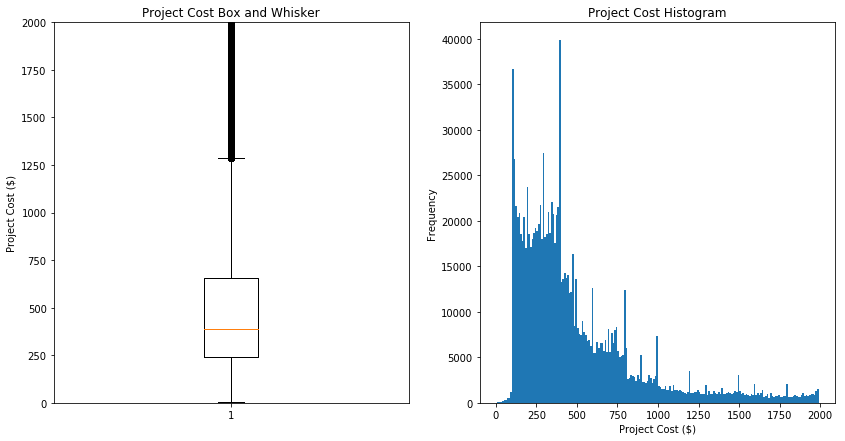

In [10]:
plt.figure(figsize=(14,7))

resources['Total Cost'] = resources['Resource Quantity'] * resources['Resource Unit Price']
proj_res = resources.groupby('Project ID').aggregate(np.sum)


project_costs = proj_res['Total Cost'].dropna()

plt.subplot(1,2,1)
plt.boxplot(project_costs)
plt.ylim(ymax=2000, ymin=0)
plt.ylabel('Project Cost ($)')
plt.title('Project Cost Box and Whisker')

plt.subplot(1,2,2)
plt.hist(project_costs, bins=np.arange(0,2000,10))
plt.xlabel('Project Cost ($)')
plt.ylabel('Frequency')
plt.title('Project Cost Histogram')


print('mean is: $' + str(np.mean(project_costs)))
print('median is: $' + str(np.median(project_costs)))
print('maximum project cost: $' +str(np.max(project_costs)))

The project cost data is skewed right with no outliers to the left but many to the right. 90% of the projects cost under \$1100, but some projects cost a lot more, with the maximum project cost being $214,135.00.

The average (mean) project cost is \$556.02 but this seems to be inflated by very high outliers. The median cost is \$385.33, which seems to be a more accurate measure as the most frequent project costs look to be between \$100 and $400.

The x axis on the histogram and the y axis on the box and whisker plot (Project Cost) is cut off at \$200 because of very high outliers. Showing all of the data (with outliers) makes the data difficult to see.

In [11]:
print(project_costs.value_counts(bins=np.arange(0,2000,10)))
# np.std(project_costs)
project_costs.quantile(.9)

(390.0, 400.0]      39963
(100.0, 110.0]      36817
(290.0, 300.0]      27781
(110.0, 120.0]      26560
(190.0, 200.0]      23869
(340.0, 350.0]      22233
(270.0, 280.0]      21693
(120.0, 130.0]      21518
(380.0, 390.0]      21517
(140.0, 150.0]      21133
(320.0, 330.0]      21078
(350.0, 360.0]      20725
(370.0, 380.0]      20606
(170.0, 180.0]      20563
(130.0, 140.0]      20433
(260.0, 270.0]      19703
(240.0, 250.0]      19235
(250.0, 260.0]      18767
(230.0, 240.0]      18639
(310.0, 320.0]      18561
(200.0, 210.0]      18538
(330.0, 340.0]      18460
(150.0, 160.0]      18352
(280.0, 290.0]      17946
(220.0, 230.0]      17879
(300.0, 310.0]      17840
(160.0, 170.0]      17752
(360.0, 370.0]      17506
(210.0, 220.0]      17256
(180.0, 190.0]      16893
                    ...  
(1560.0, 1570.0]      826
(1780.0, 1790.0]      820
(1920.0, 1930.0]      792
(1730.0, 1740.0]      758
(1700.0, 1710.0]      751
(1850.0, 1860.0]      744
(1660.0, 1670.0]      733
(1770.0, 178

1099.99